In [1]:
import xlrd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
def select_random_sheets(num_sheets, total_sheets, with_replacement):
    sequence = range(1,total_sheets+1)
    if with_replacement == True:
        sample = np.random.choice(sequence, num_sheets)
    else:
        sample = random.sample(sequence, num_sheets)
    return sample

def consolidate_sample_sheets(sample):
    filename = "2. DEBE_Mock data.xlsx"
    sheetname = "Student " + str(sample[0])
#     print(sample)
#     print(sheetname)
    df = pd.read_excel(filename, sheet_name=sheetname, usecols='M:Q')
    for index in range(1, len(sample)):
        sheetname = "Student " + str(sample[index])
#         print(sheetname)
        df_temp = pd.read_excel(filename, sheet_name=sheetname, usecols='M:Q')
        df = df + df_temp
#     print(sample)
    df['Unnamed: 12'] = df['Unnamed: 12']//len(sample)
    return df

def running_average_two_rows(data_frame):
    lastdict = {'Unnamed: 12':[48], 'Difficult.2':[0], 'Easy.2':[0], 'Boring.2':[0], 'Engaging.2':[0]   }
    last_frame = pd.DataFrame(lastdict)
    data_frame = pd.concat([data_frame, last_frame], ignore_index = True)
    for index in range(len(data_frame)-1):
        data_frame.iloc[index] = ((data_frame.iloc[index] + data_frame.iloc[index+1]))/2
        data_frame.iloc[index] = (data_frame.iloc[index]).apply(np.ceil)
    data_frame['Unnamed: 12'] = data_frame['Unnamed: 12'] -1
    data_frame = data_frame.drop(len(data_frame)-1)
    data_frame['Unnamed: 12'][47] = data_frame['Unnamed: 12'][47] + 1   
    return data_frame

def calculate_net(data_frame):
    dict_temp = {'Timestamp': list(range(1, 49)), 'Net Engagement':[0]*48, 'Net Difficulty':[0]*48}
    net_value_data_frame = pd.DataFrame(dict_temp)
    net_value_data_frame['Net Engagement'] = data_frame['Engaging.2'] - data_frame['Boring.2']
    net_value_data_frame['Net Difficulty'] = data_frame['Difficult.2'] - data_frame['Easy.2']
    return net_value_data_frame

def calculate_net_percentages(net_value_data_frame, number_of_sheets):
    net_value_data_frame['Net Engagement'] = round((net_value_data_frame['Net Engagement']/number_of_sheets)*100)
    net_value_data_frame['Net Difficulty'] = round((net_value_data_frame['Net Difficulty']/number_of_sheets)*100)
    net_value_data_frame['Net Engagement'] = net_value_data_frame['Net Engagement'].astype('int')
    net_value_data_frame['Net Difficulty'] = net_value_data_frame['Net Difficulty'].astype('int')
    return net_value_data_frame

def calculateSSE(net_value_percent_population, net_value_percent_sample):
    dict_temp = {'Timestamp': list(range(1, 49)), 'Net Engagement':[0]*48, 'Net Difficulty':[0]*48}
    error_data_frame = pd.DataFrame(dict_temp)
    error_data_frame['Net Engagement'] = net_value_percent_population['Net Engagement'] - net_value_percent_sample['Net Engagement']
    error_data_frame['Net Difficulty'] = net_value_percent_population['Net Difficulty'] - net_value_percent_sample['Net Difficulty']
#     print(error_data_frame)
    error_data_frame['Net Engagement'] = error_data_frame['Net Engagement']**2
    error_data_frame['Net Difficulty'] = error_data_frame['Net Difficulty']**2
#     print(error_data_frame)
    net_engagement_sse = error_data_frame['Net Engagement'].sum()
    net_difficulty_sse = error_data_frame['Net Difficulty'].sum()
#     print(net_engagement_sse, net_difficulty_sse)
    return net_engagement_sse, net_difficulty_sse

def calculate_average_sse(sample_number_of_sheets, total_number_of_students, net_values_percent):
    samples_list = select_random_sheets(num_sheets = sample_number_of_sheets, total_sheets = total_number_of_students, with_replacement=False)
    df_consolidated_sample =consolidate_sample_sheets(samples_list)
    df_consolidated_sample_averaged = running_average_two_rows(df_consolidated_sample)
    net_values_sample = calculate_net(df_consolidated_sample_averaged)
    net_values_sample_percent = calculate_net_percentages(net_values_sample, sample_number_of_sheets)
    net_engagement_sse, net_difficulty_sse = calculateSSE(net_values_percent, net_values_sample_percent)
    return net_engagement_sse, net_difficulty_sse, net_values_sample_percent
    
    

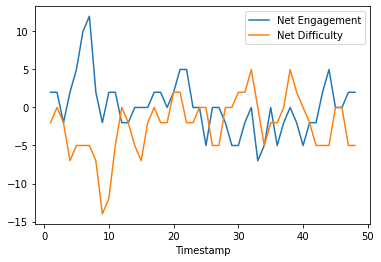

In [3]:
filename = "2. DEBE_Mock data.xlsx"

total_number_of_students = 42
sample_number_of_students = 42

samples_list = select_random_sheets(num_sheets = sample_number_of_students, total_sheets = total_number_of_students, with_replacement=False)
df_consolidated =consolidate_sample_sheets(samples_list)
df_consolidated_averaged = running_average_two_rows(df_consolidated)
net_values = calculate_net(df_consolidated_averaged)
net_values_percent = calculate_net_percentages(net_values, sample_number_of_students)

fig, axs = plt.subplots(figsize=(6.0, 4.0))
net_values_percent.plot('Timestamp', ['Net Engagement', 'Net Difficulty'], ax=axs)                  
fig.savefig("plot42.png")

In [4]:
 ##SSE_data_frame = pd.DataFrame({'Timestamp': list(range(10, 43)), 'Error Engagement':[0]*33, 'Error Difficulty':[0]*33})
    
SSE_data_frame = pd.DataFrame(columns=('number_of_samples', 'net_engagement_sse', 'net_difficulty_sse'))
#SSE_data_frame.loc[len(SSE_data_frame.index)] = [10, 10, 10]
#SSE_data_frame.loc[len(SSE_data_frame.index)] = [10, 10, 10]
print(SSE_data_frame)

SSE_average = pd.DataFrame(columns=('number_of_samples', 'net_engagement_sse', 'net_difficulty_sse'))

Empty DataFrame
Columns: [number_of_samples, net_engagement_sse, net_difficulty_sse]
Index: []


2031 2226
2951 2506
2551 2846
1691 2926
2611 2266
1951 2426
2911 2566
1831 2846
2131 1986
2171 2286
2283.0 2488.0
980 884
863 1595
832 943
975 619
1234 1067
1822 881
1133 1543
1790 1256
1406 1378
2009 1201
1304.4 1136.7
661 901


<ipython-input-5-591b00c7c203>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(12.0, 4.0))


856 451
726 881
696 606
606 336
886 686
576 571
596 311
1041 626
476 571
712.0 594.0
543 422
439 446
503 438
335 334
367 374
399 462
503 422
487 470
303 366
391 390
427.0 412.4
180 254
270 236
235 190
443 301
377 179
374 218
358 189
288 150
246 299
328 260
309.9 227.6
134 182
95 130
53 136
149 71
142 185
122 143
167 95
233 143
212 173
179 230
148.6 148.8
27 38
56 51
30 72
14 24
27 51
36 64
25 48
26 20
25 77
31 34
29.7 47.9


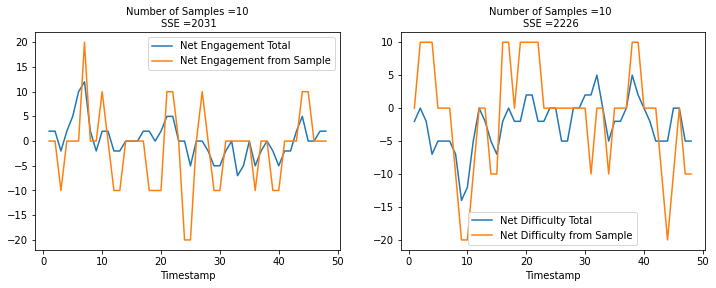

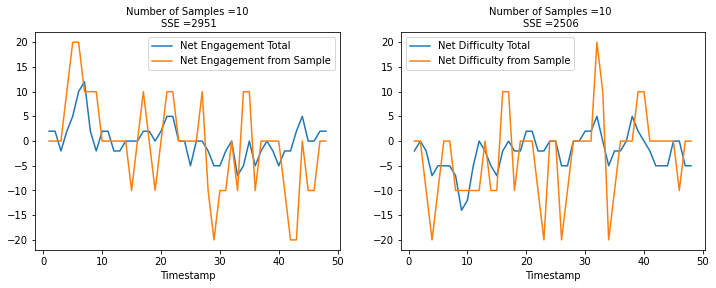

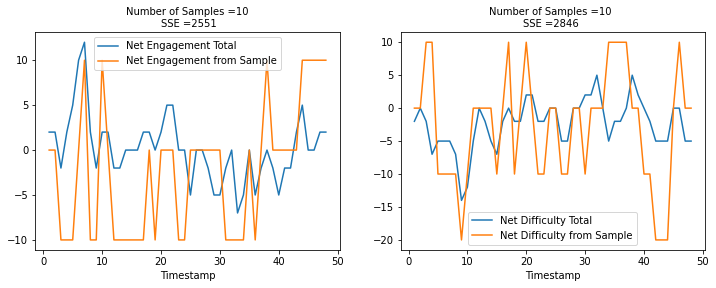

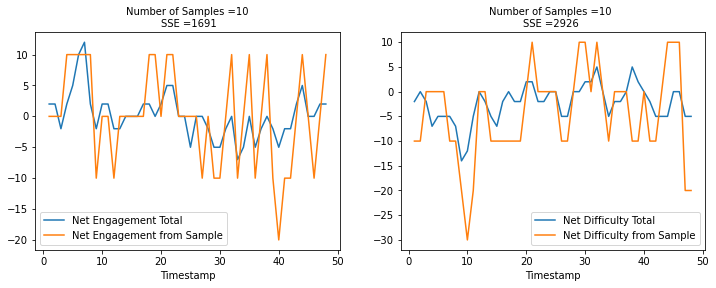

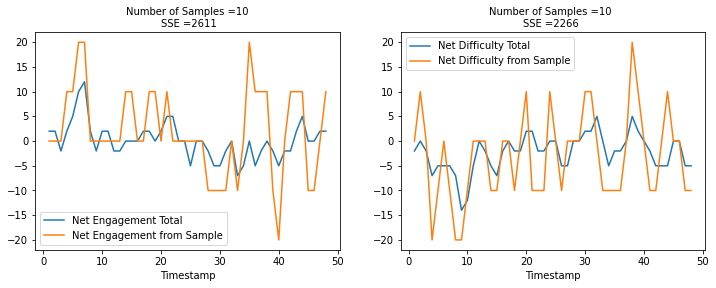

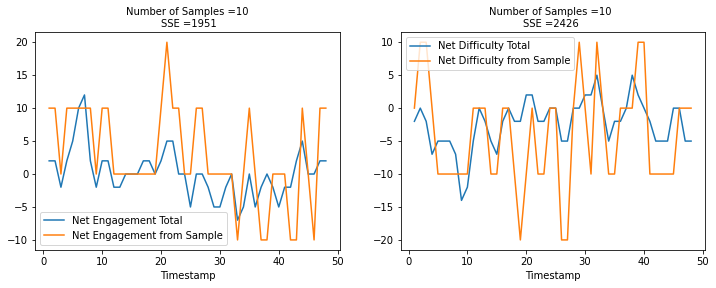

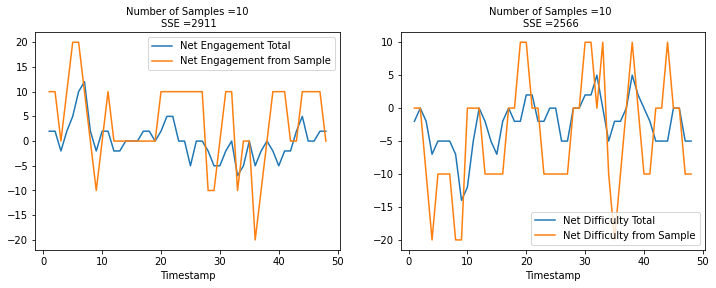

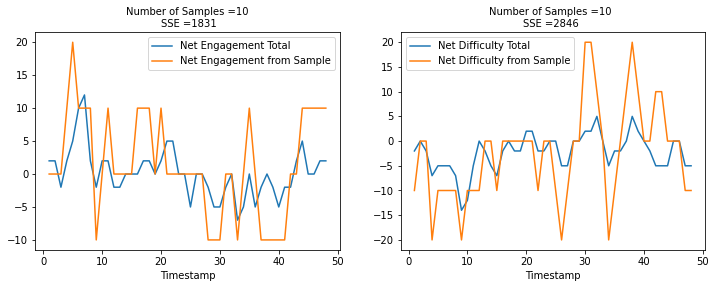

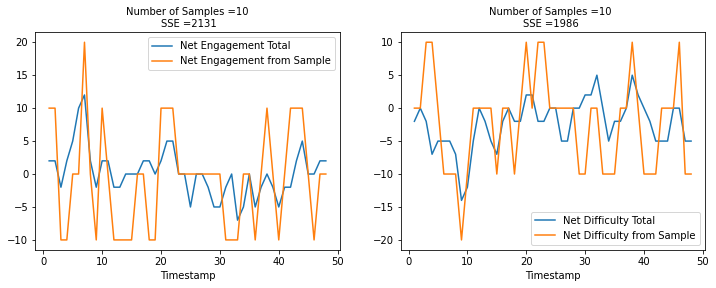

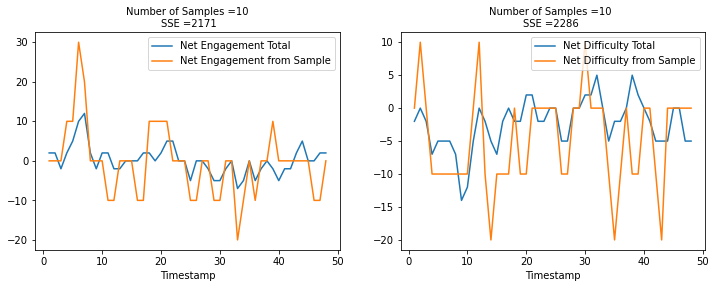

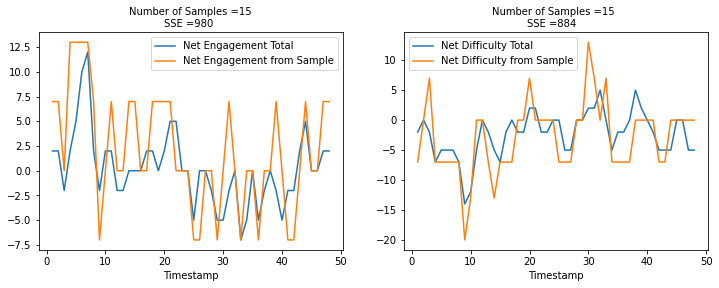

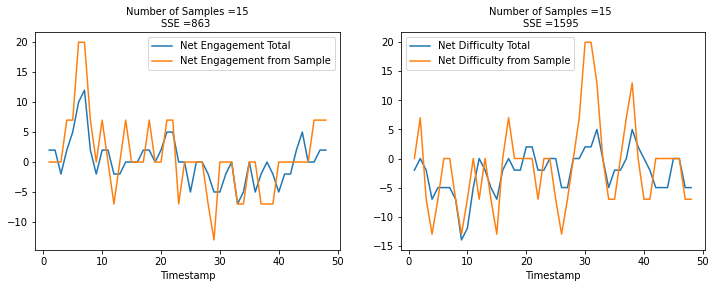

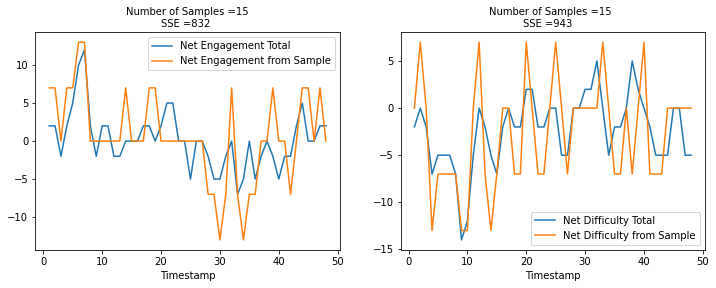

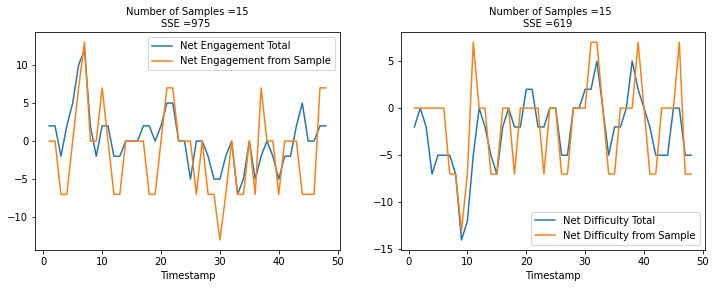

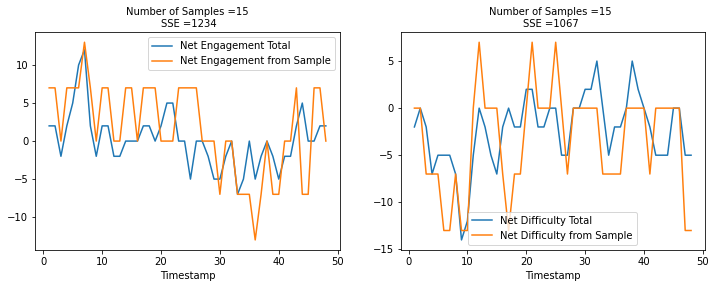

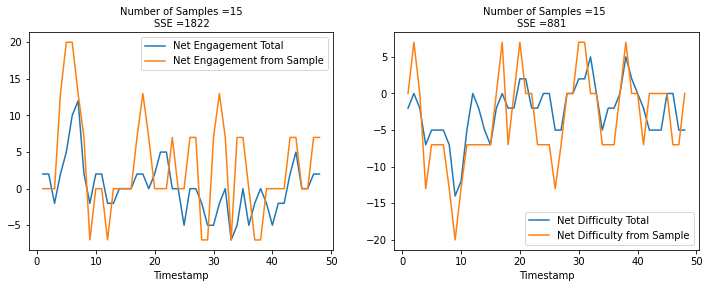

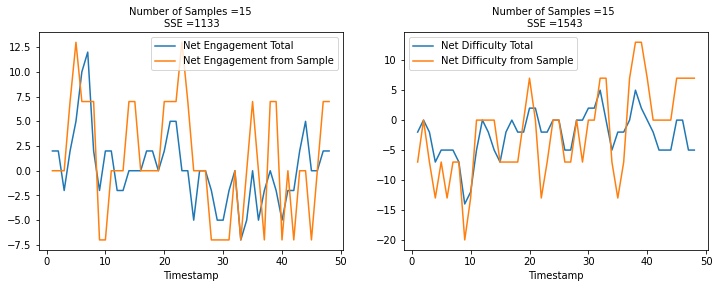

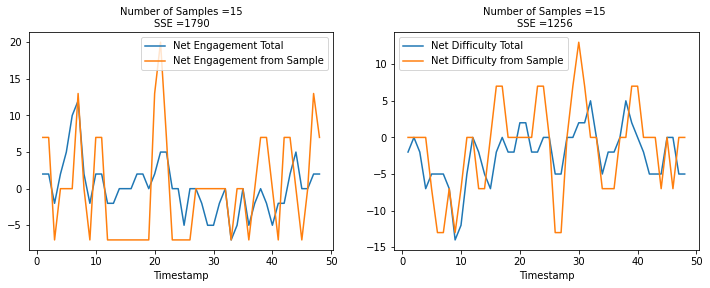

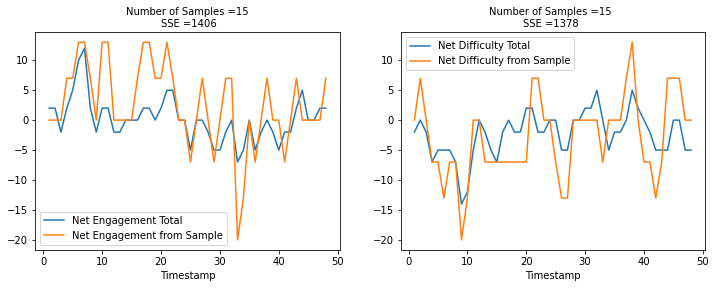

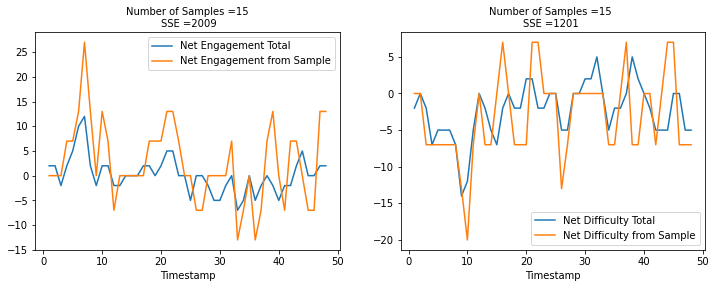

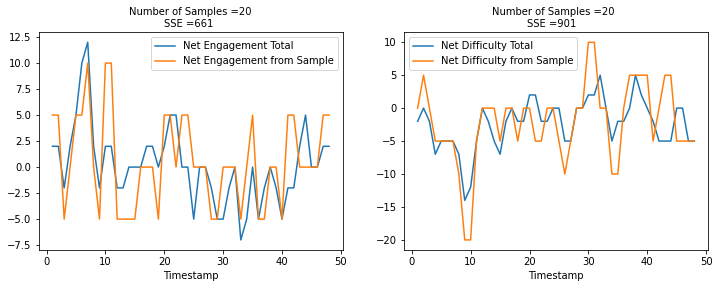

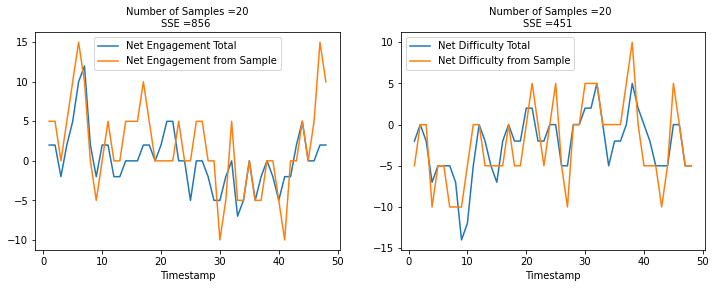

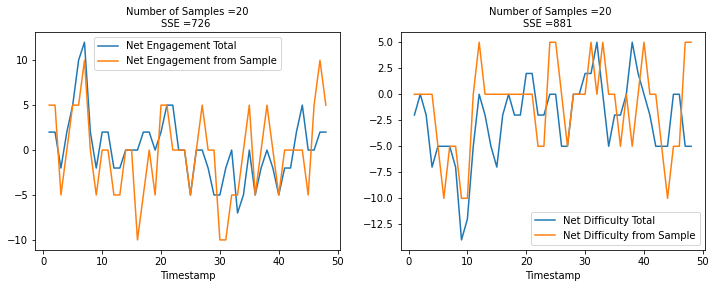

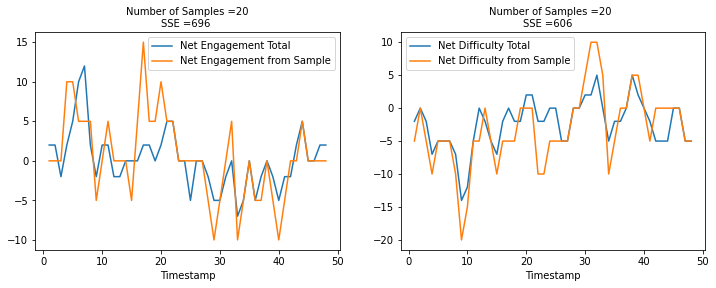

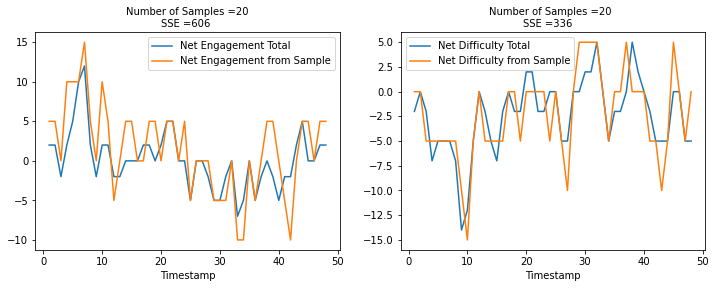

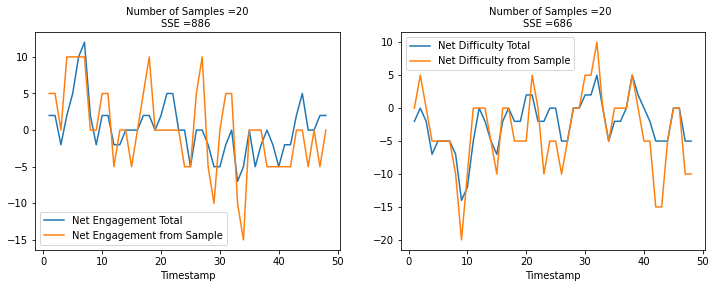

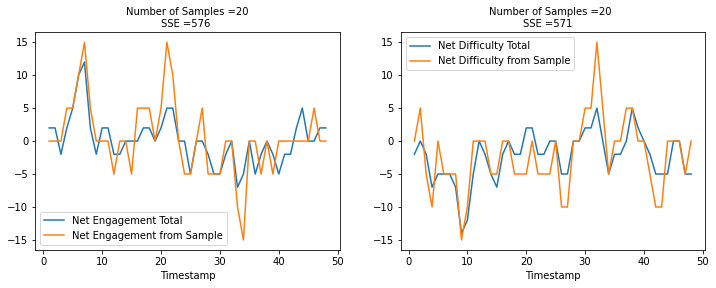

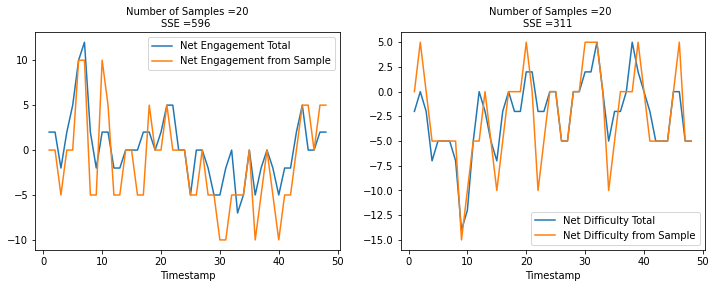

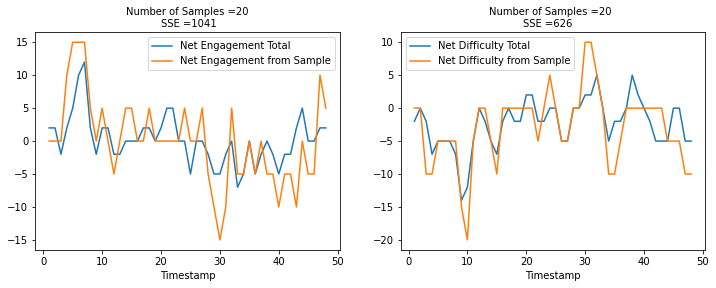

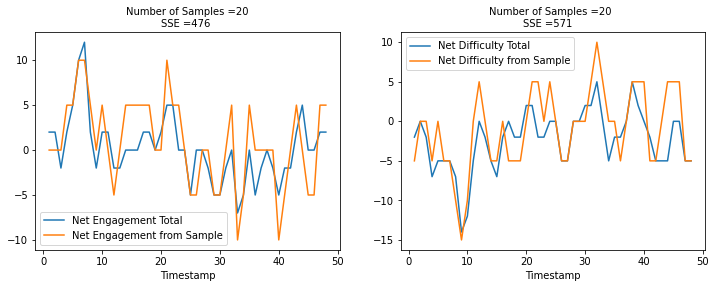

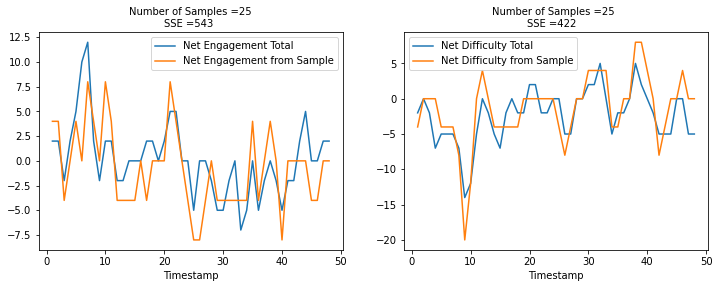

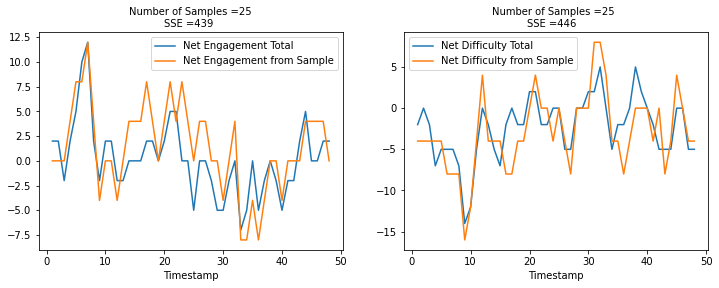

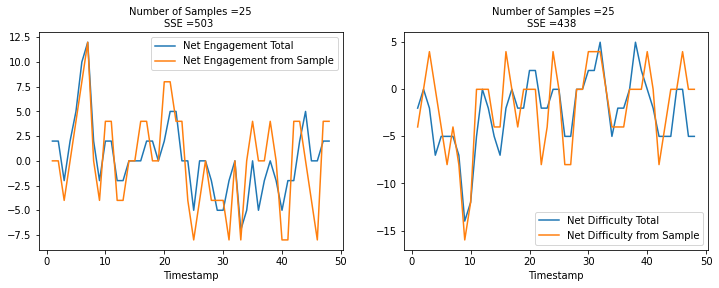

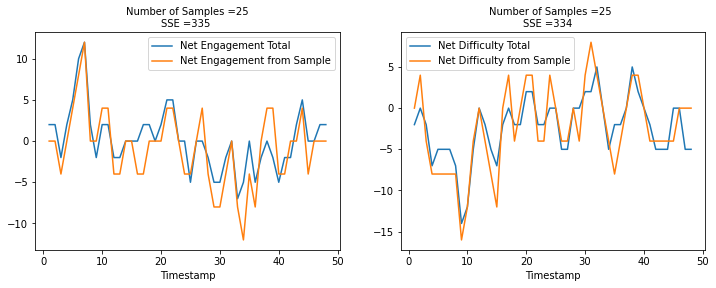

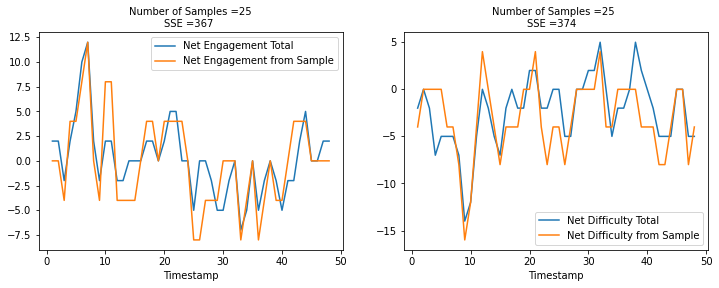

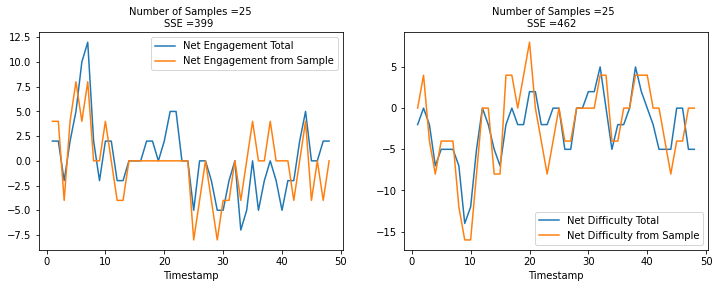

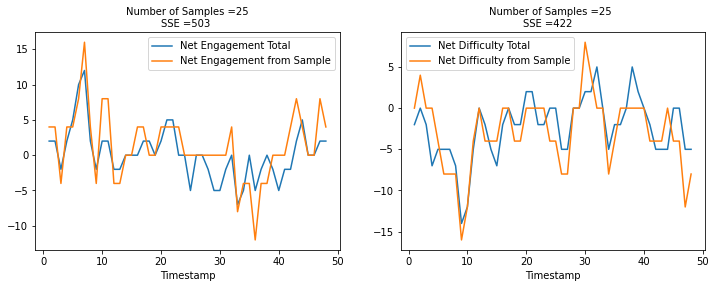

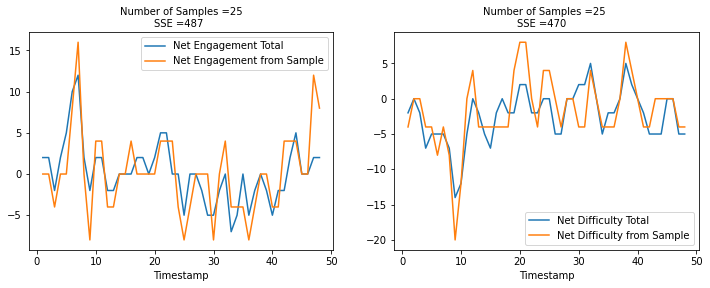

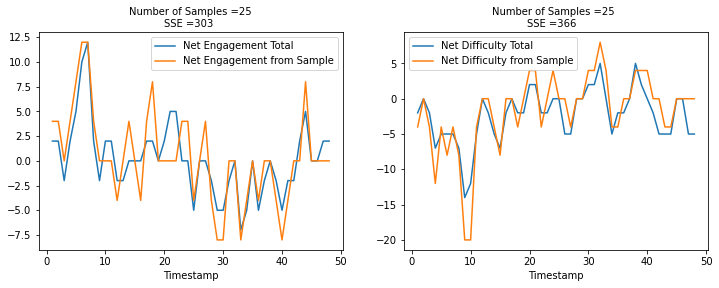

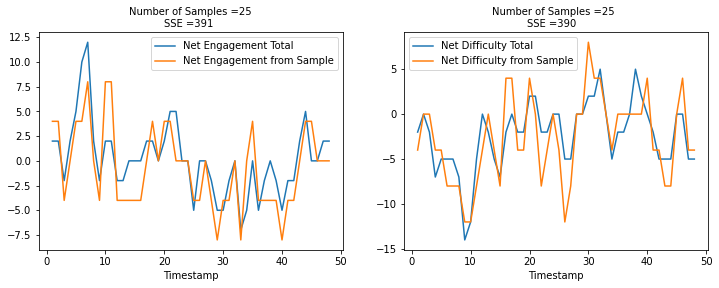

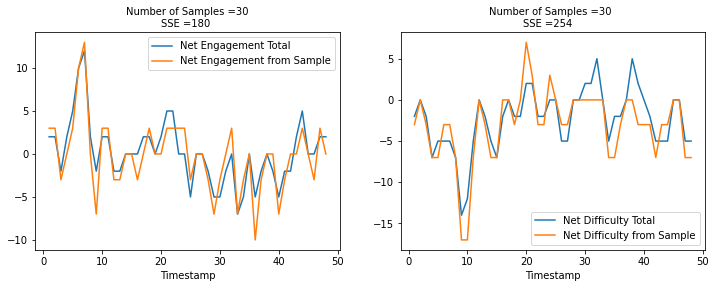

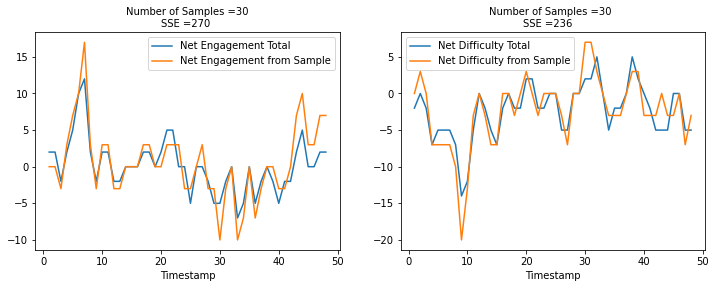

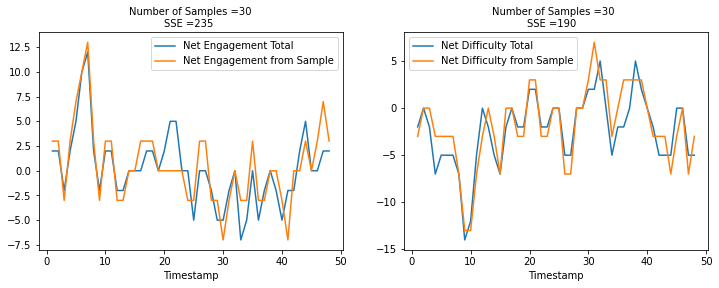

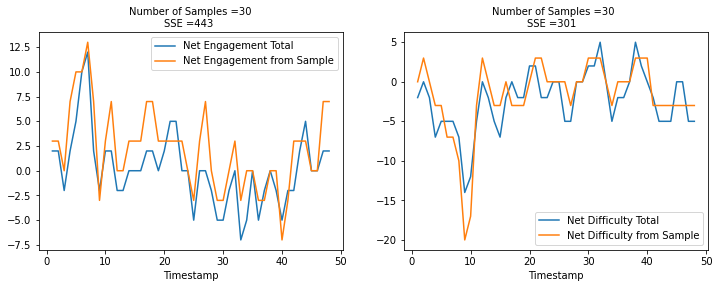

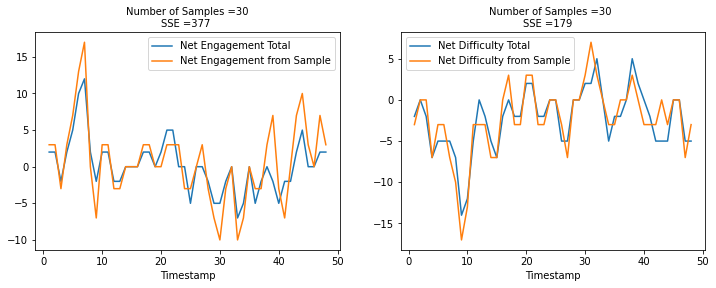

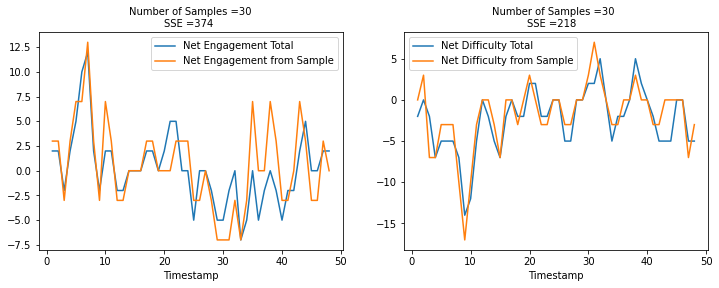

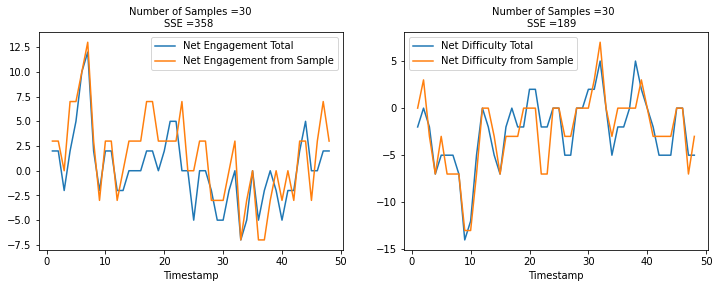

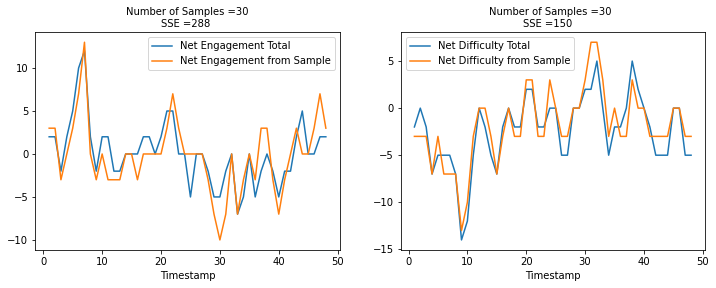

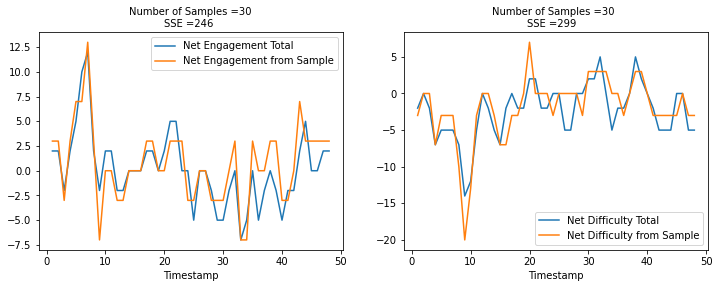

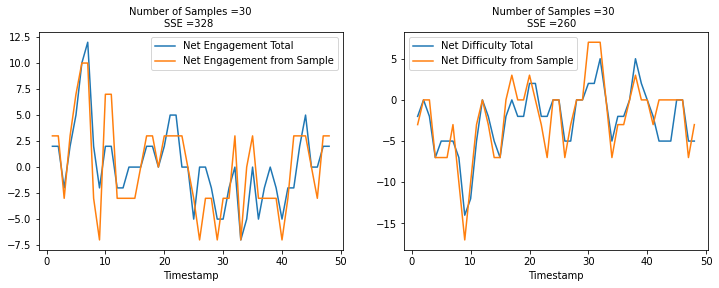

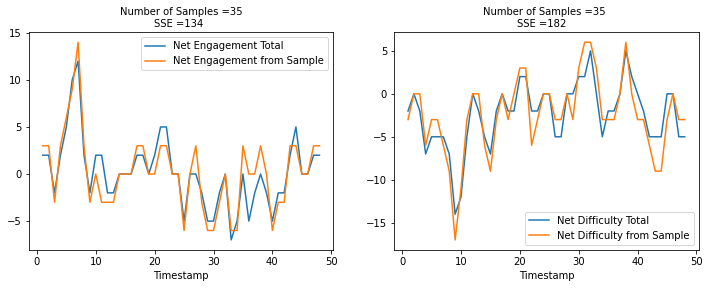

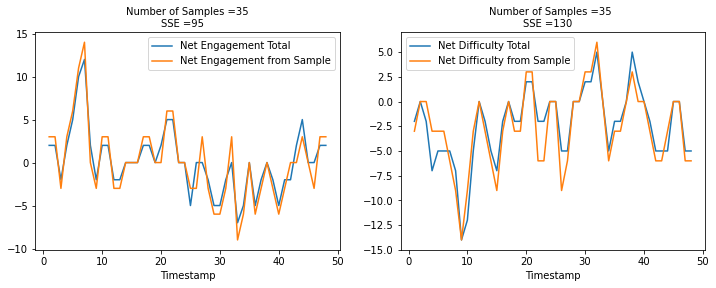

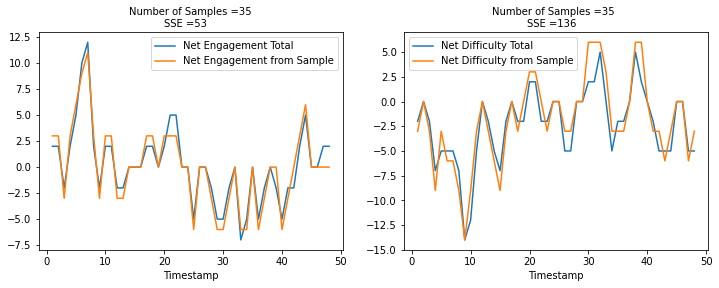

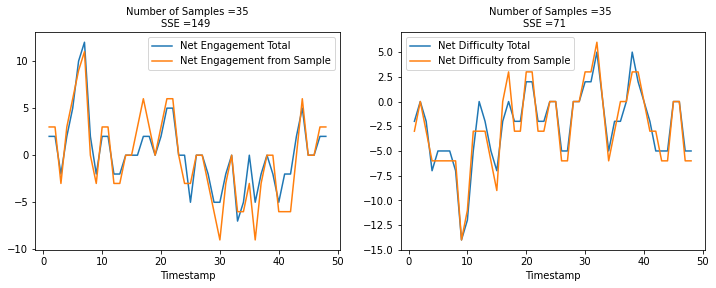

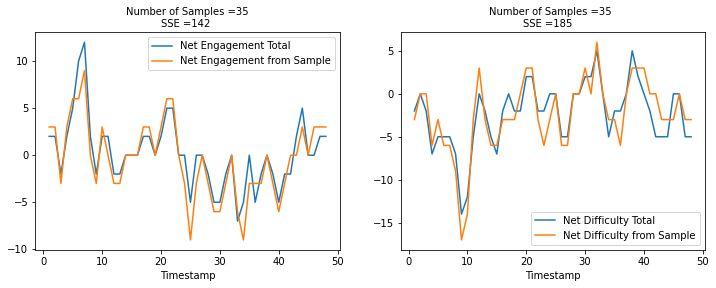

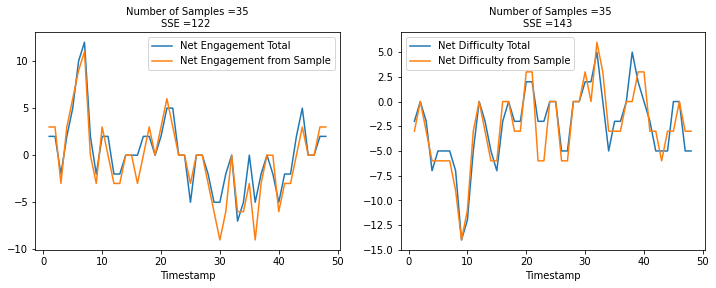

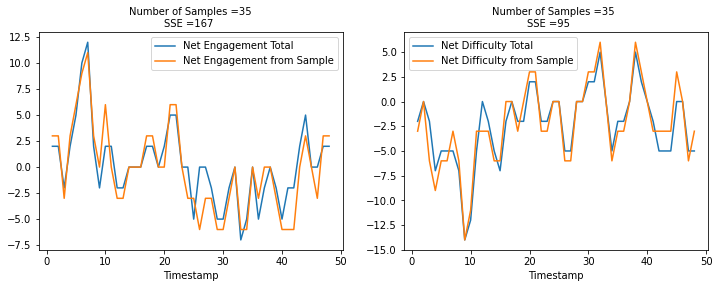

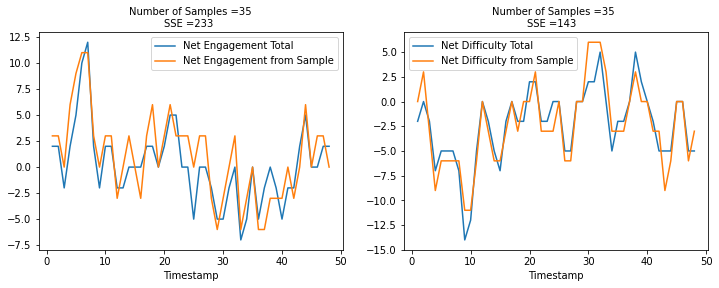

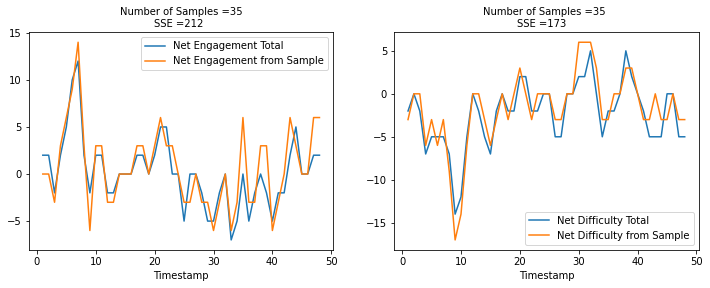

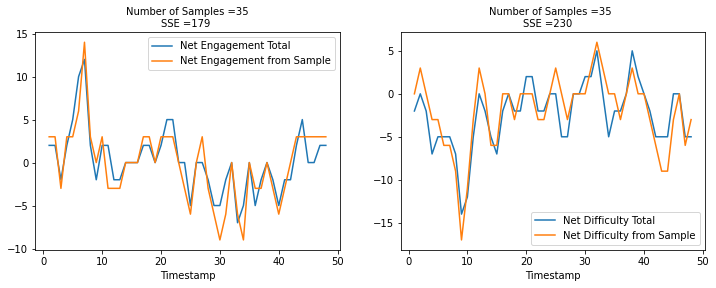

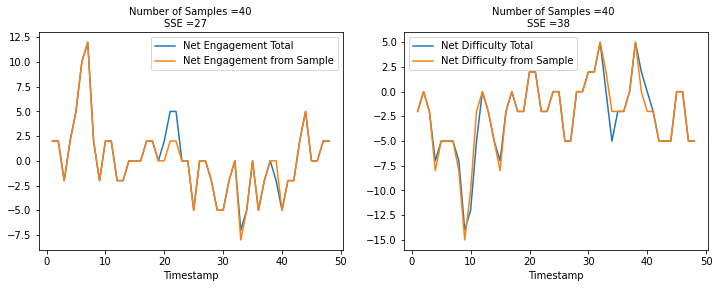

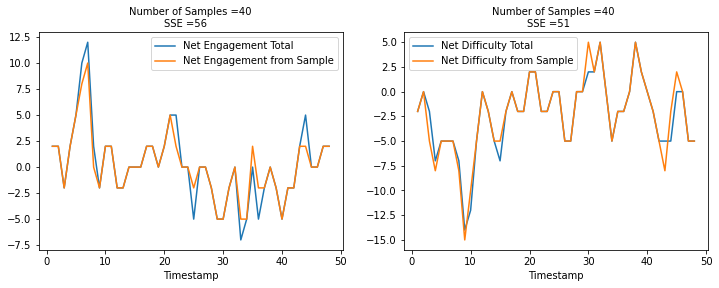

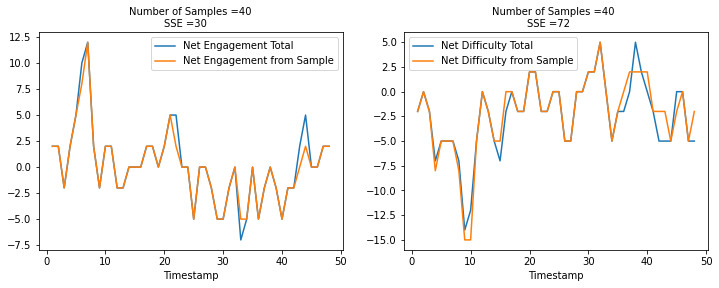

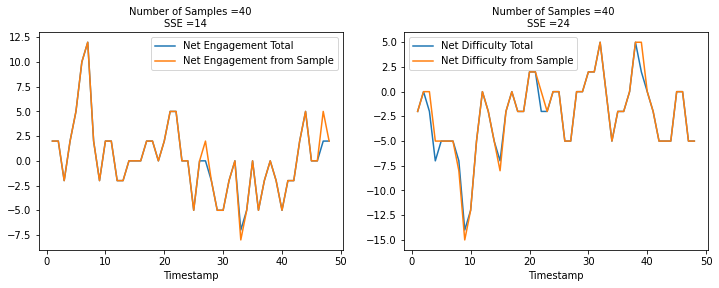

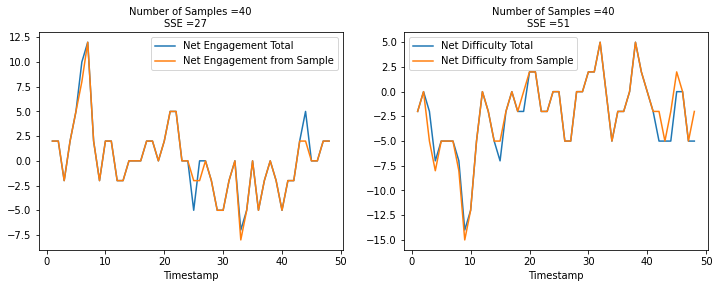

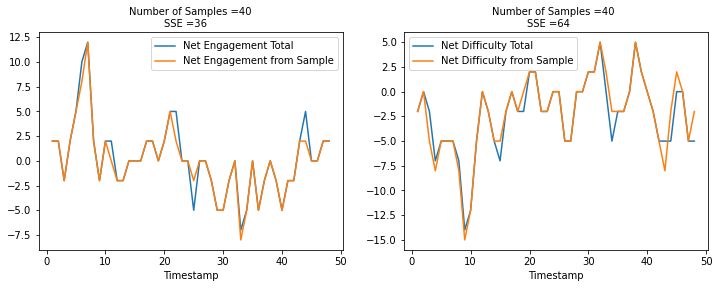

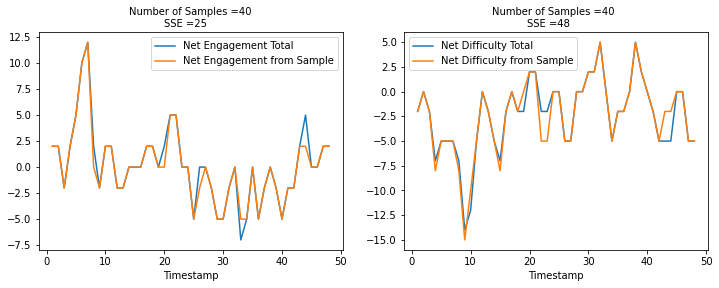

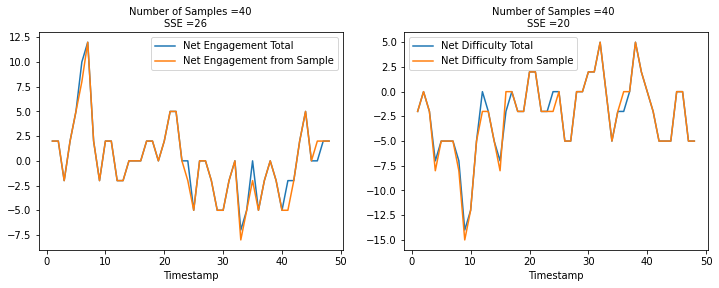

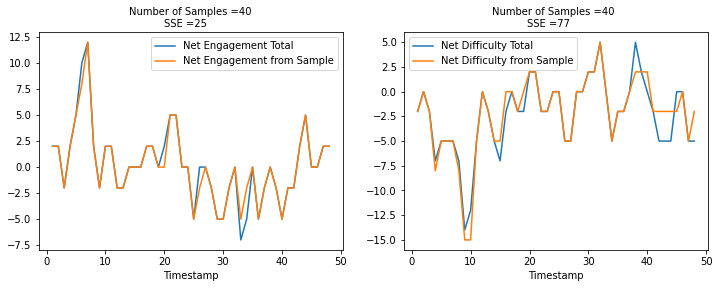

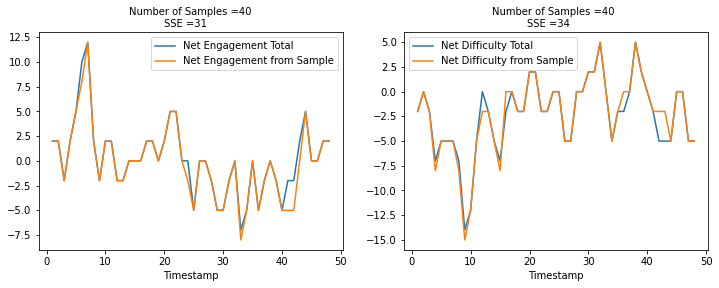

In [5]:
total_number_of_students = 42

for sample in range(10,43, 5):
    sample_number_of_students = sample
    avg_engagement_sse, avg_difficulty_sse = 0, 0
    for i in range(10):    
        net_e_sse, net_d_sse, net_values_sample_percent = calculate_average_sse(sample_number_of_students, total_number_of_students, net_values_percent)
        avg_engagement_sse = avg_engagement_sse + net_e_sse
        avg_difficulty_sse = avg_difficulty_sse + net_d_sse
        print(net_e_sse, net_d_sse)
        
        
        dict_temp_1 = {'Timestamp': list(range(1, 49)), 'Net Engagement Total':[0]*48, 'Net Engagement from Sample':[0]*48}
        dict_temp_2 = {'Timestamp': list(range(1, 49)), 'Net Difficulty Total':[0]*48, 'Net Difficulty from Sample':[0]*48}
        engagement_data_frame = pd.DataFrame(dict_temp_1)
        difficulty_data_frame = pd.DataFrame(dict_temp_2)
        
        engagement_data_frame['Net Engagement Total'] = net_values_percent['Net Engagement']
        engagement_data_frame['Net Engagement from Sample'] = net_values_sample_percent['Net Engagement']
        difficulty_data_frame['Net Difficulty Total'] = net_values_percent['Net Difficulty']
        difficulty_data_frame['Net Difficulty from Sample'] = net_values_sample_percent['Net Difficulty']
        
        fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(12.0, 4.0))
        engagement_data_frame.plot('Timestamp', ['Net Engagement Total', 'Net Engagement from Sample'], ax=axs1)
        difficulty_data_frame.plot('Timestamp', ['Net Difficulty Total', 'Net Difficulty from Sample'], ax=axs2)
        fig.text(0.27,0.90,"SSE =" + str(net_e_sse))
        fig.text(0.69,0.90,"SSE =" + str(net_d_sse))
        fig.text(0.23,0.94,"Number of Samples =" + str(sample))
        fig.text(0.65,0.94,"Number of Samples =" + str(sample))
        fig.savefig("figure_" + str(sample) + "_" + str(i) + ".png")
        
        
        SSE_data_frame.loc[len(SSE_data_frame.index)] = [sample_number_of_students, net_e_sse, net_d_sse]
    print(avg_engagement_sse/10, avg_difficulty_sse/10)
    SSE_average.loc[len(SSE_average.index)] = [sample_number_of_students, avg_engagement_sse/10, avg_difficulty_sse/10]

   number_of_samples net_engagement_sse net_difficulty_sse
0                 10               2031               2226
1                 10               2951               2506
2                 10               2551               2846
3                 10               1691               2926
4                 10               2611               2266
..               ...                ...                ...
65                40                 36                 64
66                40                 25                 48
67                40                 26                 20
68                40                 25                 77
69                40                 31                 34

[70 rows x 3 columns]
   number_of_samples  net_engagement_sse  net_difficulty_sse
0               10.0              2283.0              2488.0
1               15.0              1304.4              1136.7
2               20.0               712.0               594.0
3               25.0     

<AxesSubplot:xlabel='number_of_samples', ylabel='net_engagement_sse'>

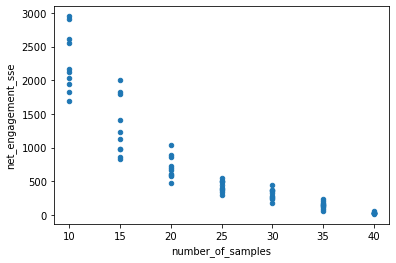

In [6]:
print(SSE_data_frame)
print(SSE_average)
SSE_data_frame.plot.scatter(x = 'number_of_samples', y = 'net_engagement_sse')

<AxesSubplot:xlabel='number_of_samples', ylabel='net_engagement_sse'>

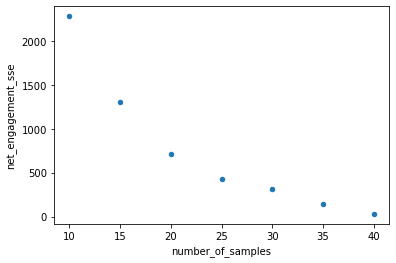

In [7]:
SSE_average.plot.scatter(x = 'number_of_samples', y = 'net_engagement_sse')

<AxesSubplot:xlabel='number_of_samples', ylabel='net_difficulty_sse'>

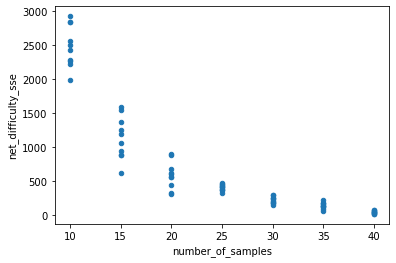

In [8]:
SSE_data_frame.plot.scatter(x = 'number_of_samples', y = 'net_difficulty_sse')

<AxesSubplot:xlabel='number_of_samples', ylabel='net_difficulty_sse'>

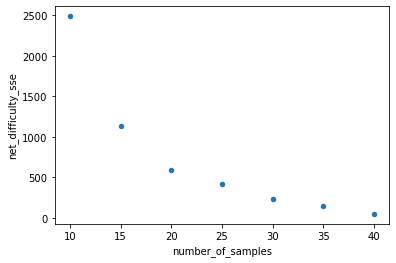

In [9]:
SSE_average.plot.scatter(x = 'number_of_samples', y = 'net_difficulty_sse')